In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates
import matplotlib.dates as mdates
import pandas as pd
import cv2

In [2]:
def read_file(file_path):
    try:
        
        data = pd.read_csv(file_path, header=None)
        data.columns = ["Date","Time", "ID", "RSSI"]
        return data[["Time","ID","RSSI"]]
    except Exception as e:
        print("Error occured while reading the file {}".format(file_path))
        print(str(e))

In [ ]:
file_name = "bluetooth_all.txt"
data_all=pd.DataFrame(columns=['Time','ID', 'RSSI', 'PI'])
for name in dirlist:
    print(name)
    data = read_file(os.path.join(base_path,name, file_name))
    print(len(data))
    if len(data)>0:
        pi=int(name.split('.')[0][2:])*np.ones(len(data))
        data['PI']=pi
        data_all=pd.concat([data_all, data])

print(data_all.head())
print(len(data_all))
print(max(data_all['RSSI']))
print(min(data_all['RSSI']))

In [36]:
dfs = []
fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/BLE_DATA_July_02_2.csv'

data = pd.read_csv(fname, sep=",", header=None, names=["Time", "ID", "RSSI", "PI"])

In [37]:
dfs.append(data.copy())
dfs = pd.concat(dfs)
dfs = dfs.reset_index(drop=True)
#dfs_sorted = dfs.sort_values(dfs.columns[0], ascending=True)
dfs_sorted = dfs

dfs_sorted

,Time,ID,RSSI,PI
0,Time,ID,RSSI,PI
1,1719918060.1235244,d4:13:5c:c3:7e:36,-79,163
2,1719918061.1547215,d4:13:5c:c3:7e:36,-79,163
3,1719918070.1579015,d4:13:5c:c3:7e:36,-79,163
4,1719918075.2962327,d4:13:5c:c3:7e:36,-86,124
...,...,...,...,...
3974,1719973219.9966464,d4:13:5c:c3:7e:36,-84,133
3975,1719973697.4632826,d4:13:5c:c3:7e:36,-81,133
3976,1719974572.1522548,d4:13:5c:c3:7e:36,-84,133
3977,1719975290.130477,d4:13:5c:c3:7e:36,-85,133


In [38]:
dfs_sorted.drop(dfs_sorted.head(1).index,inplace=True)
dfs_sorted["Time"] = dfs_sorted["Time"].astype(float)
dfs_sorted["RSSI"] = dfs_sorted["RSSI"].astype(int)
dfs_sorted
#dfs_sorted[dfs_sorted['PI'] == '108']

,Time,ID,RSSI,PI
1,1.719918e+09,d4:13:5c:c3:7e:36,-79,163
2,1.719918e+09,d4:13:5c:c3:7e:36,-79,163
3,1.719918e+09,d4:13:5c:c3:7e:36,-79,163
4,1.719918e+09,d4:13:5c:c3:7e:36,-86,124
5,1.719918e+09,d4:13:5c:c3:7e:36,-79,163
...,...,...,...,...
3974,1.719973e+09,d4:13:5c:c3:7e:36,-84,133
3975,1.719974e+09,d4:13:5c:c3:7e:36,-81,133
3976,1.719975e+09,d4:13:5c:c3:7e:36,-84,133
3977,1.719975e+09,d4:13:5c:c3:7e:36,-85,133


In [7]:
data_all = dfs_sorted
print(data_all.head())
print(len(data_all))
print(max(data_all['RSSI']))
print(min(data_all['RSSI']))

                 Time                 ID RSSI   PI
1  1719918060.1235244  d4:13:5c:c3:7e:36  -79  163
2  1719918061.1547215  d4:13:5c:c3:7e:36  -79  163
3  1719918070.1579015  d4:13:5c:c3:7e:36  -79  163
4  1719918075.2962327  d4:13:5c:c3:7e:36  -86  124
5   1719918076.184579  d4:13:5c:c3:7e:36  -79  163
3978
-95
-63


In [10]:
unique_ID,counts=np.unique(data_all['ID'],return_counts=True)
print(unique_ID)
print(counts)

['d4:13:5c:c3:7e:36']
[3978]


In [11]:
unique_pi,countsp=np.unique(data_all['PI'],return_counts=True)
print(unique_pi)
print(countsp)

['106' '107' '108' '115' '120' '124' '125' '132' '133' '135' '139' '143'
 '146' '147' '148' '149' '150' '151' '152' '153' '154' '155' '156' '158'
 '161' '163']
[ 143    5   21   10   19  314   24    3  388    4    5   45    1   10
   53   20  152    7    5   19   24   13   13    4   14 2662]


In [39]:
#image=cv2.imread('/Users/ykiaras/Desktop/Map.png')
image = cv2.imread("ep6_floorplan_measured_half_gridded_1_meter.jpg", cv2.IMREAD_COLOR)
#img = cv2.resize(img, (610*3, 389*3))

print(np.shape(image))
# image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.resize(image,(610*3,389*3))
print(np.shape(image))
overlay = image.copy()
#loading pi locations
# locations=pd.read_csv('/Users/ykiaras/Desktop/Pi_locations.csv')
# print(locations)

locations = np.loadtxt(
        "PiLocations.csv",
        delimiter=",",
        dtype={"names": ("Pi", "X", "Y"), "formats": ("i", "i", "i")},
        skiprows=1,)
    
Pi, X, Y = [], [], []

for location in locations:
    Pi.append(location[0])
    X.append(location[1])
    Y.append(location[2])
    
data = {'PI': Pi, 'X': X, 'Y': Y,}
df = pd.DataFrame(data)

df["PI"] = df["PI"].astype(int)
df["X"] = df["X"].astype(int)
df["Y"] = df["Y"].astype(int)
df['loc'] = df.apply(lambda row: (row['X'], row['Y']), axis=1)

(817, 1220, 3)
(1167, 1830, 3)


<ipython-input-39-3025a241b638>:14: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  locations = np.loadtxt(


In [27]:
df['PI'].iloc[1]

101

In [29]:
df.loc[df['PI']==163]

,PI,X,Y,loc
35,163,1637,1287,"(1637, 1287)"


In [43]:
for ID in range(0,len(unique_ID)):
# Creating info Matrix for each ID
    ID_matrix=data_all.loc[data_all["ID"]==unique_ID[ID]]
    ID_matrix=ID_matrix.reset_index(drop=True)
    
    ID_matrix['Time'] = pd.to_datetime(ID_matrix["Time"],unit='s', utc=True)
    #dataframe_sorted['Time_loc'] = pd.to_datetime(dataframe_sorted['Time_loc'],unit='s', utc=True)
    ID_matrix=ID_matrix.sort_values(by='Time')
    
    unique_t,counts_t=np.unique(ID_matrix['Time'],return_counts=True)
    # print(unique_t[counts_t==2])
    # print(max(counts_t))
    
    
    for time in unique_t:
        Matrix_t=ID_matrix.loc[ID_matrix['Time']==time]
        Matrix_t=Matrix_t.reset_index(drop=True)
        
        for row in range(0,len(Matrix_t)):
            
            pi=Matrix_t['PI'].iloc[row]
            
            pi_loc=df.loc[df['PI']==int(pi)]
            print(pi)  #, pi_loc)
            # Center coordinates
            center_coordinates = ( int(pi_loc['X'])*3,int(pi_loc['Y'])*3)
         
            # Radius of circle
            ro = int(Matrix_t['RSSI'].loc[row])
            radius = int(((252+ ro)*80/42))
            # Blue color in BGR
            color = np.random.randint(0, 255, size=(3, ))

    #convert data types int64 to int
            color = ( int (color [ 0 ]), int (color [ 1 ]), int (color [ 2 ]))
            # Line thickness of 2 px
            thickness = -1
            # Using cv2.circle() method
            # Draw a circle with blue line borders of thickness of 2 px
            
            overlay=cv2.circle(overlay, center_coordinates, radius, tuple (color), thickness)
            # alpha = 1-((102+Matrix_t['RSSI'].loc[row])/42)  # Transparency factor.
        
  
            
            # image_new = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
            # image_new = cv2.putText(image_new, str(Matrix_t['Time'].iloc[0])[10:], (1600,1100), font, fontScale, color, thickness, cv2.LINE_AA)
        # print(pi)

163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
124
124
163
163
163
163
163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
163
163
163
163
163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163


163
163
163
163
163
163
163
163
124
124
163
163
124
163
163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
133
163
163
163
163
133
163
163
124
163
163
163
163
163
163
163
163
163
133
163
133
163
133
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
133
163
133
124
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
133
163
133
163
133
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
133
163
163
124
163
163
163
163
124
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
163
124
124
163
124
124
163
163
163
163
163
163
163
163
163
133
124
163
163
163
163
163
163
163
124
163
163
163
133
133
133
133
163
124
163
163
163
124
163
163
163
163
163
163
163
163
163
163
163
163
163
124
163
163
163
163
133
124
124
163
124
163
124
163
163
163
163
163
163
163
163
163
133
133
124
163
124
163
163
163
163
163
163
133
133
163
133
163
124
163
163
163
133
163
163
163
163
163
163


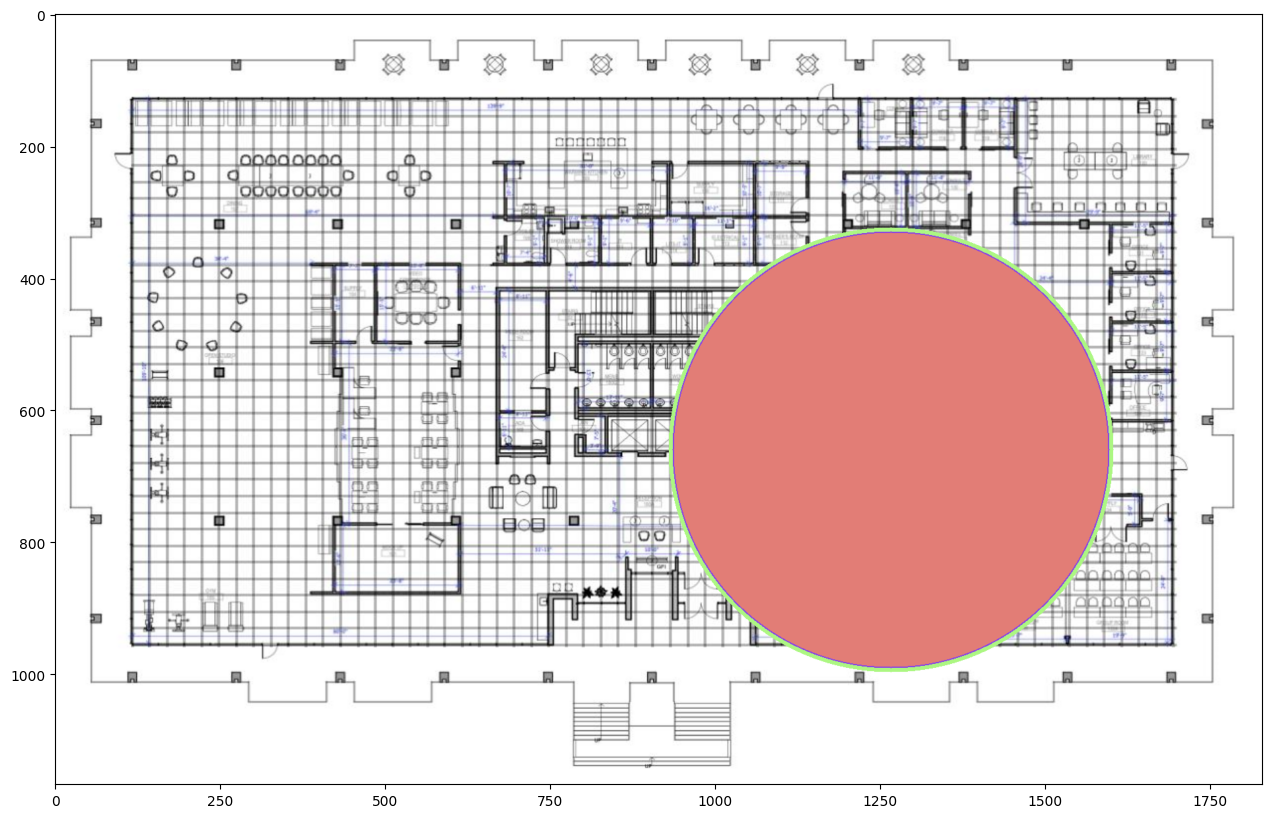

In [42]:
plt.figure(figsize=(20,10))
plt.imshow(overlay)
plt.show()

<ipython-input-49-f0f84f4a51e1>:7: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  locations = np.loadtxt(


1830x1167


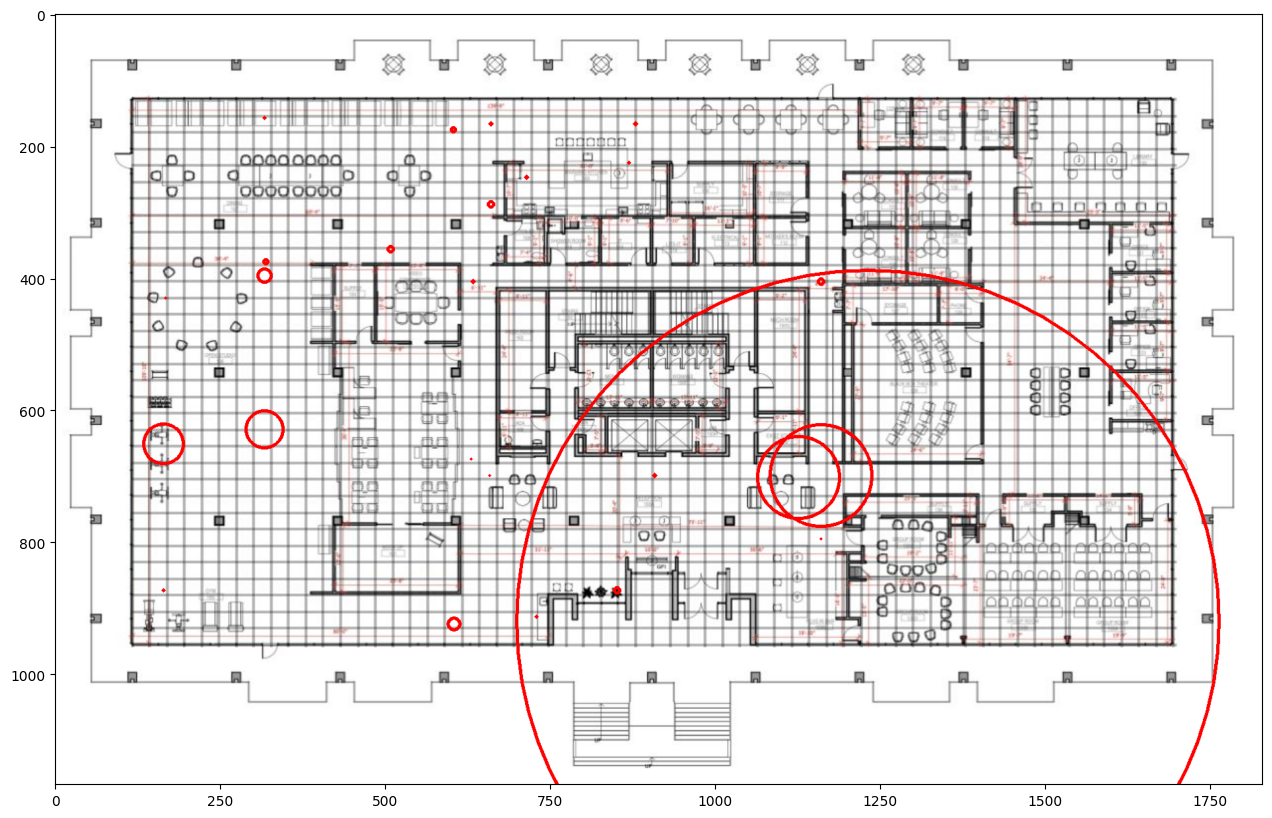

In [49]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Pi, X, and Y Locations on Map
locations = np.loadtxt(
    "PiLocations.csv",
    delimiter=",",
    dtype={"names": ("Pi", "X", "Y"), "formats": ("i", "i", "i")},
    skiprows=1
)

Pi, X, Y = [], [], []

for location in locations:
    Pi.append(location[0])
    X.append(location[1])
    Y.append(location[2])

data = {'Pi': Pi, 'X': X, 'Y': Y}
df = pd.DataFrame(data)

unique_pi = [106, 107, 108, 115, 120, 124, 125, 132, 133, 135, 139, 143,
             146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158,
             161, 163]
unique_pi_strength = [143, 5, 21, 10, 19, 314, 24, 3, 388, 4, 5, 45, 1, 10,
                      53, 20, 152, 7, 5, 19, 24, 13, 13, 4, 14, 2662]

# Create a dictionary for quick lookup of strength values by Pi
strength_dict = dict(zip(unique_pi, unique_pi_strength))

# Filter df to only include rows where Pi is in unique_pi
filtered_df = df[df['Pi'].isin(unique_pi)]

# Load and resize the image
img = cv2.imread("ep6_floorplan_measured_half_gridded_1_meter.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (610 * 3, 389 * 3))

wid = img.shape[1]
hgt = img.shape[0]

print(f"{wid}x{hgt}")

color = [0, 0, 255]

# Draw circles based on filtered DataFrame
for i in range(len(filtered_df)):
    pi_value = filtered_df.iloc[i]['Pi']
    x_coord = int(filtered_df.iloc[i]['X'] * 1830 / 2432)
    y_coord = int(filtered_df.iloc[i]['Y'] * 1167 / 1632)
    radius = int(strength_dict[pi_value] / 5)  # Adjust the divisor as needed to scale the radius
    # Draw filled circle on the overlay
    #cv2.circle(overlay, (x_coord, y_coord), radius, color, -1) 
    # Draw border circle on the original image
    cv2.circle(img, (x_coord, y_coord), radius, color, 3)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [68]:
dfs = []
fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/BLE_DATA_July_02_1_slice.csv'

data = pd.read_csv(fname, sep=",", header=None, names=["Time", "ID", "RSSI", "PI"])

dfs.append(data.copy())
dfs = pd.concat(dfs)
dfs = dfs.reset_index(drop=True)
#dfs_sorted = dfs.sort_values(dfs.columns[0], ascending=True)
dfs_sorted = dfs
dfs_sorted.drop(dfs_sorted.head(1).index,inplace=True)
dfs_sorted["Time"] = dfs_sorted["Time"].astype(float)
dfs_sorted["RSSI"] = dfs_sorted["RSSI"].astype(int)

unique_pi,unique_pi_strength=np.unique(dfs_sorted['PI'],return_counts=True)
unique_pi = unique_pi.astype(int)
unique_pi_strength = unique_pi_strength.astype(int)
print(unique_pi)
print(countsp)

[106 107 108 115 120 124 132 133 139 143 147 148 149 150 152 153 154 155
 156 158 161]
[ 143    5   21   10   19  314   24    3  388    4    5   45    1   10
   53   20  152    7    5   19   24   13   13    4   14 2662]


In [69]:
dfs = []
fname = '/home/naveenb/vital_ws/EP6/EP6_multimodal_barun/multimodal_integration/ble/data/BLE_DATA_July_02_1.csv'

data = pd.read_csv(fname, sep=",", header=None, names=["Time", "ID", "RSSI", "PI"])

dfs.append(data.copy())
dfs = pd.concat(dfs)
dfs = dfs.reset_index(drop=True)
#dfs_sorted = dfs.sort_values(dfs.columns[0], ascending=True)
dfs_sorted = dfs
dfs_sorted.drop(dfs_sorted.head(1).index,inplace=True)
dfs_sorted["Time"] = dfs_sorted["Time"].astype(float)
dfs_sorted["RSSI"] = dfs_sorted["RSSI"].astype(int)

unique_pi,unique_pi_strength=np.unique(dfs_sorted['PI'],return_counts=True)
unique_pi = unique_pi.astype(int)
unique_pi_strength = unique_pi_strength.astype(int)
print(unique_pi)
print(countsp)

[106 107 108 115 120 124 132 133 135 139 143 146 147 148 149 150 152 153
 154 155 156 158 161 163]
[ 143    5   21   10   19  314   24    3  388    4    5   45    1   10
   53   20  152    7    5   19   24   13   13    4   14 2662]


<ipython-input-64-f6b032db23c7>:7: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  locations = np.loadtxt(


1830x1167


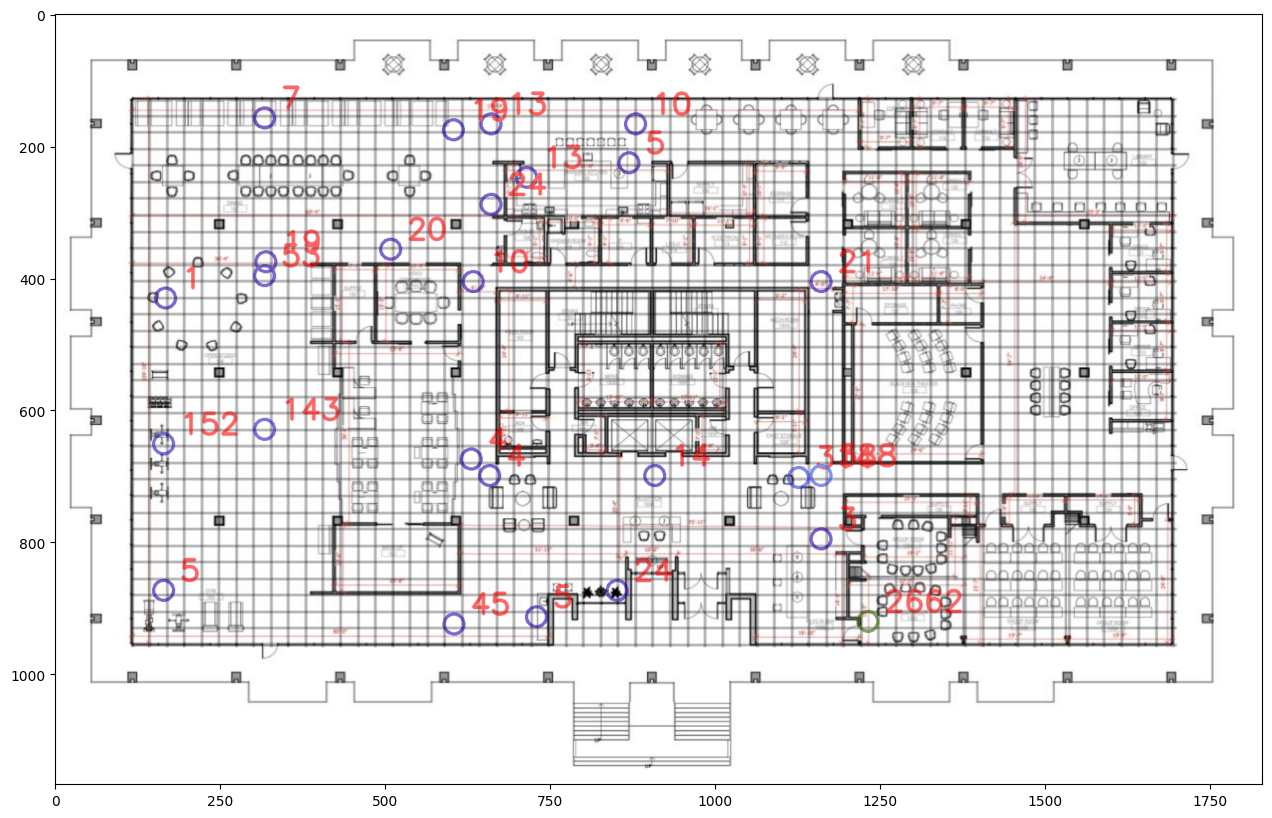

In [64]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Pi, X, and Y Locations on Map
locations = np.loadtxt(
    "PiLocations.csv",
    delimiter=",",
    dtype={"names": ("Pi", "X", "Y"), "formats": ("i", "i", "i")},
    skiprows=1
)

Pi, X, Y = [], [], []

for location in locations:
    Pi.append(location[0])
    X.append(location[1])
    Y.append(location[2])

data = {'Pi': Pi, 'X': X, 'Y': Y}
df = pd.DataFrame(data)

# unique_pi = [106, 107, 108, 115, 120, 124, 125, 132, 133, 135, 139, 143,
#              146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158,
#              161, 163]
# unique_pi_strength = [143, 5, 21, 10, 19, 314, 24, 3, 388, 4, 5, 45, 1, 10,
#                       53, 20, 152, 7, 5, 19, 24, 13, 13, 4, 14, 2662]

# Create a dictionary for quick lookup of strength values by Pi
strength_dict = dict(zip(unique_pi, unique_pi_strength))

# Normalize the strengths to the range [0, 1] for colormap
norm_strength = [strength / max(unique_pi_strength) for strength in unique_pi_strength]

# Create a dictionary for quick lookup of normalized strength values by Pi
norm_strength_dict = dict(zip(unique_pi, norm_strength))

# Filter df to only include rows where Pi is in unique_pi
filtered_df = df[df['Pi'].isin(unique_pi)]

# Load and resize the image
img = cv2.imread("ep6_floorplan_measured_half_gridded_1_meter.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (610 * 3, 389 * 3))

wid = img.shape[1]
hgt = img.shape[0]

print(f"{wid}x{hgt}")

# Define colormap
colormap = plt.get_cmap('RdYlGn')

# Create an overlay with the same size as the original image
overlay = img.copy()

alpha = 0.4  # Transparency factor

for i in range(len(filtered_df)):
    pi_value = filtered_df.iloc[i]['Pi']
    x_coord = int(filtered_df.iloc[i]['X'] * 1830 / 2432)
    y_coord = int(filtered_df.iloc[i]['Y'] * 1167 / 1632)
    
    # Get the color based on the normalized strength
    norm_value = norm_strength_dict[pi_value]
    color = colormap(norm_value)
    color = [int(c * 255) for c in color[:3]]  # Convert to BGR format and scale to [0, 255]
    
    # Draw border circle on the original image
    cv2.circle(img, (x_coord, y_coord), 15, color, 3)
    # Draw text next to the circle
    text = str(strength_dict[pi_value])
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    font_thickness = 3
    text_color = (0, 0, 250)  # Black color for text
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_x = x_coord + 25  # Offset to position the text next to the circle
    text_y = y_coord - 15  # Offset to position the text next to the circle
    
    cv2.putText(img, text, (text_x, text_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)


# Blend the overlay with the original image
cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

# Display the image
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
